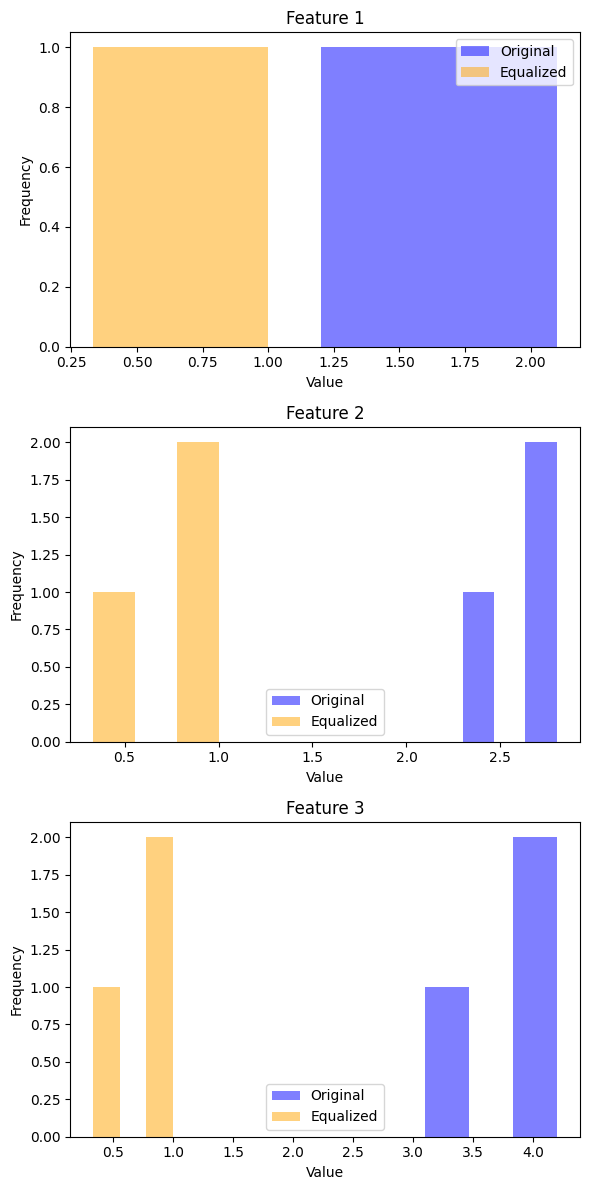

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(data):
    # 统计每一列特征的直方分布
    hist, bins = np.histogram(data, bins='auto')

    # 计算累积分布函数
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]

    # 根据累积分布函数进行直方均衡化
    equalized_data = np.interp(data, bins[:-1], cdf_normalized)

    return equalized_data

# 示例数据
feature_matrix = np.array([[1.2, 2.3, 3.1],
                           [2.1, 2.8, 4.2],
                           [1.5, 2.7, 3.9]])

# 对每一列特征进行直方均衡化
equalized_matrix = np.apply_along_axis(histogram_equalization, axis=0, arr=feature_matrix)

# 绘制直方图
num_features = feature_matrix.shape[1]
fig, axs = plt.subplots(num_features, figsize=(6, 4*num_features))

for i in range(num_features):
    # 原始特征直方图
    axs[i].hist(feature_matrix[:, i], bins='auto', alpha=0.5, color='blue', label='Original')

    # 均衡化后的特征直方图
    axs[i].hist(equalized_matrix[:, i], bins='auto', alpha=0.5, color='orange', label='Equalized')

    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title('Feature {}'.format(i+1))
    axs[i].legend()

plt.tight_layout()
plt.show()